# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [3]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

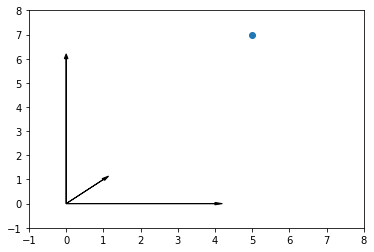

In [4]:
ax = plt.axes()

plt.xlim( [-1, 8] )
plt.ylim( [-1, 8] )

ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, 2*y[0], 2*y[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, 3*z[0], 3*z[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
plt.scatter(x[0] + 2*y[0] + 3*z[0], x[1] + 2*y[1] + 3*z[1])


plt.show()

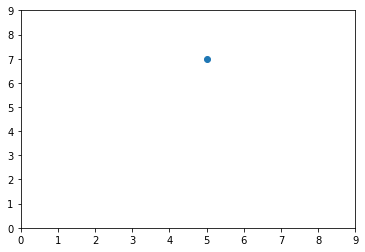

In [5]:
ax = plt.axes()
plt.xlim( [0, 9] )
plt.ylim( [0, 9] )
plt.scatter(x[0] + 2*y[0] + 3*z[0], x[1] + 2*y[1] + 3*z[1])
plt.show()

In [10]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [11]:

print('Угол между векторами x и y =',np.arccos( cosine( x, y ) ) * 360 / 2 / np.pi)

Угол между векторами x и y = 45.00000000000001


In [12]:
print('Угол между векторами x и z =',np.arccos( cosine( x, z ) ) * 360 / 2 / np.pi)

Угол между векторами x и z = 45.00000000000001


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [13]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('data/joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])
print(dfJointsVertexes.head())
print(len(dfJointsVertexes))

  type         x         y         z
0    v  0.000889  0.119490  0.010071
1    v  0.098418 -0.053715 -0.021635
2    v  0.098418 -0.053715 -0.021635
3    v  0.093672 -0.398935 -0.008132
4    v  0.094885 -0.758728 -0.036067
25


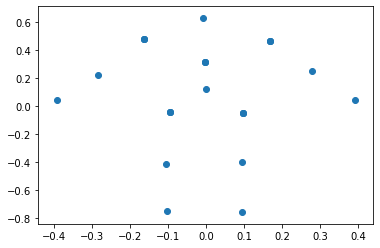

In [14]:
plt.scatter(df.x, df.y)

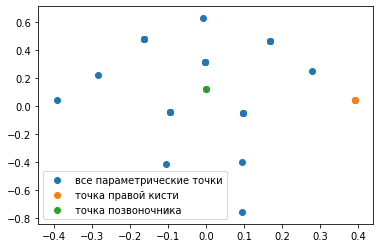

In [15]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[16], df.y[16])
plt.scatter(df.x[0], df.y[0])
plt.legend(['все параметрические точки', 'точка правой кисти', 'точка позвоночника'])

In [16]:
dist = math.sqrt(math.pow((df.x[16]-df.x[0]), 2) + math.pow((df.y[16]-df.y[0]), 2) + math.pow((df.z[16]-df.z[0]), 2))

In [17]:
print('Расстояние от точки правой кисти до точки позвоночника: ', dist)

Расстояние от точки правой кисти до точки позвоночника:  0.3996718642286445


In [18]:
vect = [df.x[16]-df.x[0], df.y[16]-df.y[0], df.z[16]-df.z[0]]
np.linalg.norm(vect)

0.3996718642286445

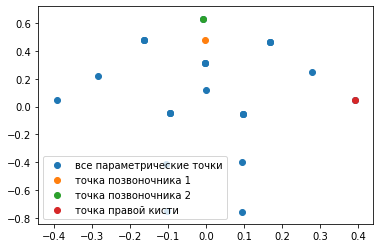

In [19]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[19])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'точка правой кисти'])

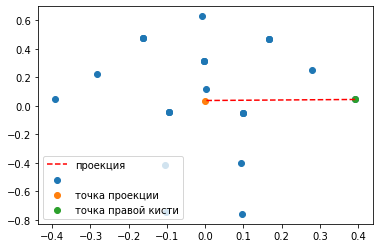

In [20]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор правой кисти
w = np.array([df.x[16],df.y[16]])

# строим проекцию данной точки w на вектор v: cv
cv = 0 + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'точка проекции', 'точка правой кисти'])

In [23]:
true_dist = linalg.norm(cv - w)
print('Расстояние от точки правой кисти до точки позвоночника: ', true_dist)

Расстояние от точки правой кисти до точки позвоночника:  0.39242508127256376


# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и решение по алгоритму на бумажке). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [24]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])



In [25]:
w, v = np.linalg.eig(m1)

In [26]:
print(m1)

[[2 2]
 [1 3]]


In [27]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


In [28]:
t, u = np.linalg.eig(m2)

In [29]:
print(m2)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


In [30]:
for i in range(len(t)):
    print("Собственное значение " + str(t[i]))
    print("соответствующий ему собственный вектор " + str(u[:,i]))

Собственное значение 5.999999999999998
соответствующий ему собственный вектор [-0.57735027 -0.57735027  0.57735027]
Собственное значение 2.9999999999999982
соответствующий ему собственный вектор [-0.81649658  0.40824829 -0.40824829]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор [0.15430335 0.6172134  0.77151675]


# Решение задачи матрицы 2х2 на тетрадке


[2, 2] -->  
[1, 3]

[2-L, 2] -->  
[1, 3-L]

Получаем квадратичное уравнение:
L^2-5*L+4=0

По формуле -x = (-b +- sqrt(b^2 - 4ac))/2a получаем корни:

L1=(5+3)/2=4
L2=(5-3)/2=1

Собственные значения нашли.

Подставляем в уравнение и получаем векторы:
x = -y

x = 2y

(4,-4) и (2,1)

# Решение матрицы 3x3 на тетрадке:





# По тому же принципу как и выше находим уравнение кубическое:
    
    -λ3+12*λ2-45*λ+54 = 0
    
    А дальше я застрял. Не знаю как найти корни здесь.
    
    Юстина, подскажите, пожалуйста, как дальше тут решить.
    
    Спасибо